In [2]:
printmd('The Inter-American Development Bank (IDB)') 
printmd('Income Qualification Project.')
printmd('Models:  4 classes Classifiers of Random Forest and Deep Neural Network.')
printmd(' ')
printmd('KFold Cross Validation, Data Balancing, Explorative Data Analysis, Feature Importance chart,\
 Imputing, Outlier removal, Classification reports, Confusion Matrices \
and Roc Curves with Auc Values for all classes and both models.')
printmd(' ')
printmd('Random Forest and Deep Neural Network both has accuracy around 99.70%')
printmd('However, Deep Neural Network Predicted classes are better spreadout than Random Forest Predicted classes.')

## <span style="color:red">The Inter-American Development Bank (IDB)</span>

## <span style="color:red">Income Qualification Project.</span>

## <span style="color:red">Models:  4 classes Classifiers of Random Forest and Deep Neural Network.</span>

## <span style="color:red"> </span>

## <span style="color:red">KFold Cross Validation, Data Balancing, Explorative Data Analysis, Feature Importance chart, Imputing, Outlier removal, Classification reports, Confusion Matrices and Roc Curves with Auc Values for all classes and both models.</span>

## <span style="color:red"> </span>

## <span style="color:red">Random Forest and Deep Neural Network both has accuracy around 99.70%</span>

## <span style="color:red">However, Deep Neural Network Predicted classes are better spreadout than Random Forest Predicted classes.</span>

In [3]:
################################################################################################
# import pandas package for reading the csv files
################################################################################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:red">'+string+'</span>'))
##############################################################################################################
# import callback and load model modules 
##############################################################################################################
import warnings
warnings.filterwarnings('ignore')
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model 
import numpy as np
from sklearn.impute import SimpleImputer

In [4]:
################################################################################################
# download the input train dataset
################################################################################################

IQdata = pd.read_csv('./datasets/IQtrain.csv')


In [5]:
################################################################################################
# check the number of rows, columns and datatype numbers in train dataset
################################################################################################

IQdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
################################################################################################
# check the statistics on train dataset
################################################################################################

IQdata.describe()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [7]:
################################################################################################
# look at the first 5 rows of the train dataset
################################################################################################

IQdata.head()


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [8]:
################################################################################################
# check the null value rows in the train dataset
################################################################################################

for i in IQdata.columns:
    if (IQdata[i].isna().sum() != 0):
        print('column :', i, 'number of null value rows', IQdata[i].isna().sum())
        

column : v2a1 number of null value rows 6860
column : v18q1 number of null value rows 7342
column : rez_esc number of null value rows 7928
column : meaneduc number of null value rows 5
column : SQBmeaned number of null value rows 5


In [9]:
################################################################################################
# check the datatype of the variables with null values 
################################################################################################

feature_cols = ['v2a1','v18q1','rez_esc','meaneduc','SQBmeaned']
for i in feature_cols:
    
      print('column :', i, 'data type is ', IQdata[i].dtype)

column : v2a1 data type is  float64
column : v18q1 data type is  float64
column : rez_esc data type is  float64
column : meaneduc data type is  float64
column : SQBmeaned data type is  float64


In [10]:
################################################################################################
# check the statistics on the variables with null values in train dataset before imputing
################################################################################################

subIQdata = IQdata[feature_cols]
subIQdata.describe()


,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
count,2.697000e+03,2215.000000,1629.000000,9552.000000,9552.000000
mean,1.652316e+05,1.404063,0.459791,9.231523,102.588867
std,1.504571e+05,0.763131,0.946550,4.167694,93.516890
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,8.000000e+04,1.000000,0.000000,6.000000,36.000000
50%,1.300000e+05,1.000000,0.000000,9.000000,81.000000
75%,2.000000e+05,2.000000,1.000000,11.600000,134.560010
max,2.353477e+06,6.000000,5.000000,37.000000,1369.000000


In [11]:
################################################################################################
# we will delete columns 'id', as it is of no use 
################################################################################################

IQdata = IQdata.drop(['Id'], axis=1)


In [12]:
################################################################################################
# we will impute 'v2a1','v18q1','rez_esc' with
# median value and 'meaneduc', 'SQBmeaned' with mean value.
# instantiate the simpleimputer function with mean and median startegy
################################################################################################


impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute2 = SimpleImputer(missing_values=np.nan, strategy='median')


In [13]:
################################################################################################
# impute the train dataset rows
################################################################################################

IQdata[['meaneduc']] = IQdata[['meaneduc']].ffill()
IQdata[['SQBmeaned']] = IQdata[['SQBmeaned']].ffill()

IQdata[['v2a1']] = IQdata[['v2a1']].ffill()
IQdata[['v18q1']] = IQdata[['v18q1']].ffill()
IQdata[['rez_esc']] = IQdata[['rez_esc']].ffill()

IQdata[['meaneduc']] = IQdata[['meaneduc']].bfill()
IQdata[['SQBmeaned']] = IQdata[['SQBmeaned']].bfill()

IQdata[['v2a1']] = IQdata[['v2a1']].bfill()
IQdata[['v18q1']] = IQdata[['v18q1']].bfill()
IQdata[['rez_esc']] = IQdata[['rez_esc']].bfill()



In [14]:
################################################################################################
# check the null values after imputing in the train dataset
################################################################################################

for i in IQdata.columns:
    if IQdata[i].isna().sum() != 0:
        print('column :', i, 'number of null value rows', IQdata[i].isna().sum())

In [15]:
################################################################################################
# gather the object type fileds for labelencoding 
################################################################################################

for i in IQdata.columns:
    if IQdata[i].dtype == object :
        print('column :', i, 'data type is ', IQdata[i].dtype)

column : idhogar data type is  object
column : dependency data type is  object
column : edjefe data type is  object
column : edjefa data type is  object


In [16]:
################################################################################################
# check the number of unique rows for the label encoding columns on the train and test datasets.
# one hot encoding will not work here as the unique values in these columns differ, and 
# dimensions will differ if dummy variables created thru one-hot-encoding
################################################################################################

feature_cols = ['idhogar','dependency','edjefe','edjefa']

for i in feature_cols:
    print('Train column ', i,' ',IQdata[i].nunique())


Train column  idhogar   2988
Train column  dependency   31
Train column  edjefe   22
Train column  edjefa   22


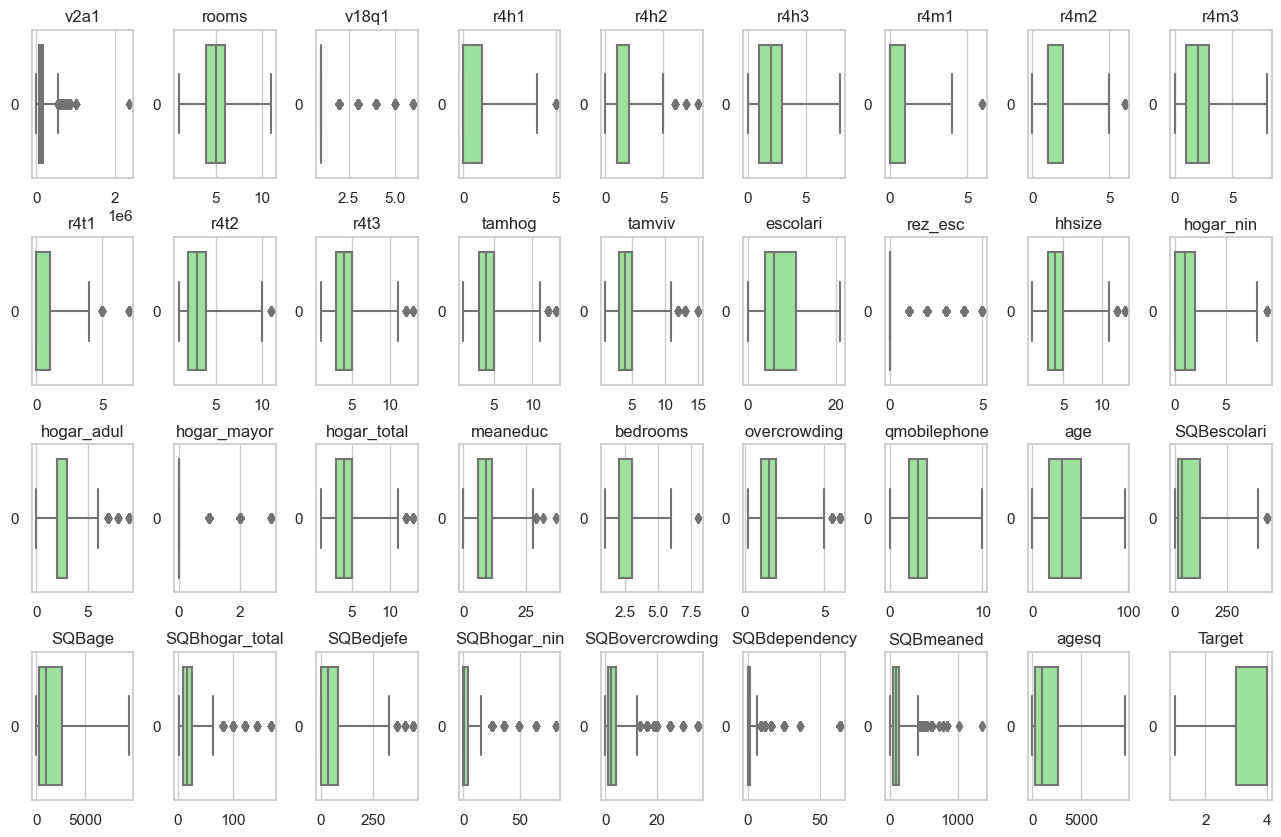

In [17]:
################################################################################################
# outlier detection in train dataset using boxplot only for those fields that have unique rows
# greater than 2 and of numerical fields
################################################################################################
J=0
plt.figure(figsize=(16,10))
plt.subplots_adjust(hspace=.4,wspace=.4)
for i in IQdata.columns: 
    if  IQdata[i].nunique() > 2 and IQdata[i].dtype != object :
        J=J+1
        plt.subplot(4,9,J)
        sns.boxplot(data=IQdata[i],whis=3,orient='h',color='lightgreen') 
        plt.title(i)  
    else:
        continue
plt.show()


In [18]:
################################################################################################
# outliers removal from the train dataset
################################################################################################

IQdata = IQdata[IQdata['SQBmeaned']      <400]
IQdata = IQdata[IQdata['SQBdependency']   <10]
IQdata = IQdata[IQdata['SQBovercrowding'] <14]
IQdata = IQdata[IQdata['SQBhogar_nin']    <25]
IQdata = IQdata[IQdata['SQBedjefe']      <350]
IQdata = IQdata[IQdata['SQBhogar_total']  <75]
IQdata = IQdata[IQdata['SQBescolari']    <400]
IQdata = IQdata[IQdata['qmobilephone']     <7]
IQdata = IQdata[IQdata['overcrowding']     <5]
IQdata = IQdata[IQdata['bedrooms']         <6]
IQdata = IQdata[IQdata['meaneduc']        <25]
IQdata = IQdata[IQdata['hogar_total']     <11]
IQdata = IQdata[IQdata['hogar_adul']       <8]
IQdata = IQdata[IQdata['hogar_nin']        <8]
IQdata = IQdata[IQdata['hhsize']          <11]
IQdata = IQdata[IQdata['tamviv']          <11]
IQdata = IQdata[IQdata['tamhog']          <11]
IQdata = IQdata[IQdata['r4t3']            <11]
IQdata = IQdata[IQdata['r4t2']             <9]
IQdata = IQdata[IQdata['r4t1']             <4]
IQdata = IQdata[IQdata['r4m3']             <8]
IQdata = IQdata[IQdata['r4m2']             <5]
IQdata = IQdata[IQdata['r4m1']             <4]
IQdata = IQdata[IQdata['r4h3']             <8]
IQdata = IQdata[IQdata['r4h2']             <5]
IQdata = IQdata[IQdata['r4h1']             <4]
IQdata = IQdata[IQdata['rooms']           <10]


In [19]:
################################################################################################
# check the shape of the train dataset after outliers removal 
################################################################################################

IQdata.shape    


(8164, 142)

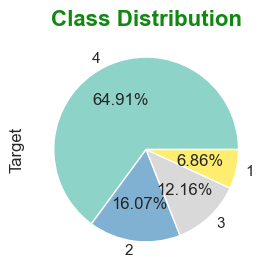

In [20]:
################################################################################################
# plot the pie chart of target variable distribution before balancing 
################################################################################################
plt.figure(figsize=(6,3))
IQdata.Target.value_counts().plot(kind='pie',autopct='%.2f%%',cmap=plt.cm.Set3)
fontdict={'fontsize':16,'color':'#118811'}
plt.title('Class Distribution',fontdict=fontdict,fontweight='bold')
plt.show()

In [21]:
printmd('Classes are not balanced; we need to balance')

## <span style="color:red">Classes are not balanced; we need to balance</span>

In [22]:
################################################################################################
# seperate the target variable claases into different files 
################################################################################################
IQdata1=IQdata[IQdata.Target==1]
IQdata2=IQdata[IQdata.Target==2]
IQdata3=IQdata[IQdata.Target==3]
IQdata4=IQdata[IQdata.Target==4]
IQdata1.shape, IQdata2.shape, IQdata3.shape, IQdata4.shape

((560, 142), (1312, 142), (993, 142), (5299, 142))

In [23]:
################################################################################################
# upsample all the minority claases to match the dominant class 
################################################################################################
IQdata1 = IQdata1.sample(frac=9.4625,replace=True,random_state=1)
IQdata2 = IQdata2.sample(frac=4.0388,replace=True,random_state=1)
IQdata3 = IQdata3.sample(frac=5.3363,replace=True,random_state=1)
IQdata1.shape, IQdata2.shape, IQdata3.shape, IQdata4.shape

((5299, 142), (5299, 142), (5299, 142), (5299, 142))

In [24]:
################################################################################################
# Take a backup of the original file incase if you need 
################################################################################################
IQdata_bkp = IQdata.copy()

In [25]:
################################################################################################
# concatenate all classes balanced data files into one file (original file name)
################################################################################################
IQdata = pd.concat([IQdata1,IQdata2,IQdata3,IQdata4],axis=0)
IQdata.shape

(21196, 142)

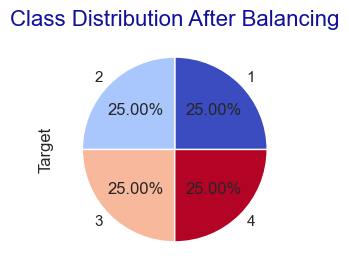

In [26]:
################################################################################################
# plot the pie chart of balanced data 
################################################################################################
plt.figure(figsize=(6,3))
IQdata.Target.value_counts().plot(kind='pie',cmap=plt.cm.coolwarm,autopct='%.2f%%') 
fontdict={'fontsize':16,'color':'#111199'}
plt.title('Class Distribution After Balancing',fontdict=fontdict)
plt.show()

In [27]:
printmd('Classes are now fully balanced.') 

## <span style="color:red">Classes are now fully balanced.</span>

In [28]:
################################################################################################
# seperate the target variable from the train dataset and store in a seperate variable
################################################################################################

IQX_train = IQdata.drop(['Target'], axis=1)
IQY_train = IQdata['Target']
print(IQX_train.shape)
print(IQY_train.shape)


(21196, 141)
(21196,)


In [29]:
################################################################################################
# split the train dataset as train test in 80/20 ratio for evaluating the accuracy
################################################################################################

from sklearn.model_selection import train_test_split

IQxtrain,IQxtest,IQytrain,IQytest = train_test_split(IQX_train,IQY_train,test_size=.2,stratify=IQY_train)


In [30]:
IQytest.value_counts()

3    1060
4    1060
2    1060
1    1060
Name: Target, dtype: int64

In [31]:
################################################################################################
# seperate the numerical and catgegorical variables from the split train dataset before scaling
################################################################################################

IQxNum_train = IQxtrain.drop(['idhogar','dependency','edjefe','edjefa'],axis=1)
IQxCat_train = IQxtrain[['idhogar','dependency','edjefe','edjefa']]


In [32]:
################################################################################################
# capture the unique values in catgegorical variables from the split train dataset before 
# encoding to be used while encoding the test datasets to replace new labels
################################################################################################

IQx_idhogar_unique    = IQxCat_train.idhogar.unique()
IQx_dependency_unique = IQxCat_train.dependency.unique()
IQx_edjefe_unique     = IQxCat_train.edjefe.unique()
IQx_edjefa_unique     = IQxCat_train.edjefa.unique()


In [33]:
################################################################################################
# do the label encoding on the split train dataset (both fit and transform)
################################################################################################

from sklearn.preprocessing import LabelEncoder

le_idhogar    = LabelEncoder()
le_dependency = LabelEncoder()
le_edjefe     = LabelEncoder()
le_edjefa     = LabelEncoder() 


IQxCat_train.idhogar    = le_idhogar.fit_transform(IQxCat_train.idhogar)
IQxCat_train.dependency = le_dependency.fit_transform(IQxCat_train.dependency)
IQxCat_train.edjefe     = le_edjefe.fit_transform(IQxCat_train.edjefe)
IQxCat_train.edjefa     = le_edjefa.fit_transform(IQxCat_train.edjefa)


In [34]:
####################################################################################
# scale the split train dataset using standared scaler
####################################################################################

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

scaler.fit(IQxNum_train)
IQtrain_scaled_data = scaler.transform(IQxNum_train)


In [35]:
################################################################################################
# seperate the numerical and catgegorical variables from the split test dataset before scaling
################################################################################################

IQxNum_test = IQxtest.drop(['idhogar','dependency','edjefe','edjefa'],axis=1)
IQxCat_test = IQxtest[['idhogar','dependency','edjefe','edjefa']]


In [36]:
################################################################################################
# prepare the data for label encoding on the split test dataset (transform only, no fitting)
# by replacing the new labels with one of the existing labels
################################################################################################

i = 0
while i < IQxCat_test.shape[0]:
    
    if IQxCat_test.idhogar.iat[i] not in IQx_idhogar_unique:
        IQxCat_test.idhogar.iat[i] = IQx_idhogar_unique[0]
        
    if IQxCat_test.dependency.iat[i] not in IQx_dependency_unique:
        IQxCat_test.dependency.iat[i] = IQx_dependency_unique[0]
        
    if IQxCat_test.edjefe.iat[i] not in IQx_edjefe_unique:
        IQxCat_test.edjefe.iat[i] = IQx_edjefe_unique[0]
        
    if IQxCat_test.edjefa.iat[i] not in IQx_edjefa_unique:
        IQxCat_test.edjefa.iat[i] = IQx_edjefa_unique[0]
        
    i = i + 1
    

In [37]:
################################################################################################
# do the label encoding on the split test dataset (transform only, no fitting)
################################################################################################

IQxCat_test.idhogar    = le_idhogar.transform(IQxCat_test.idhogar)
IQxCat_test.dependency = le_dependency.transform(IQxCat_test.dependency)
IQxCat_test.edjefe     = le_edjefe.transform(IQxCat_test.edjefe)
IQxCat_test.edjefa     = le_edjefa.transform(IQxCat_test.edjefa)


In [38]:
###############################################################################################
# scale the split test dataset using standared scaler
###############################################################################################

IQtest_scaled_data = scaler.transform(IQxNum_test)


In [39]:
###############################################################################################
# concatenate the categorical and numerical parts of split train and test datasets 
###############################################################################################

IQxtrainFull = np.concatenate((IQxCat_train,IQtrain_scaled_data),axis=1)
IQxtestFull = np.concatenate((IQxCat_test,IQtest_scaled_data),axis=1)


In [40]:
################################################################################################
# check the shapes of the dataset after concatenating
################################################################################################

IQxtrainFull.shape, IQxtestFull.shape, IQytrain.shape, IQytest.shape


((16956, 141), (4240, 141), (16956,), (4240,))

In [41]:
################################################################################################
# import the Random Forest Classifier from sklearn ensemble and permutation_importance\sklearn
################################################################################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance 


In [42]:
################################################################################################
# instantiate the Random Forest Classifier
################################################################################################

rfc = RandomForestClassifier()


In [43]:
################################################################################################
# set the required parameters for Random Forest Classifier to override defaults
################################################################################################

rfc.n_estimators=600
rfc.verbose=1
rfc.criterion='entropy'
rfc.bootstrap=True
rfc.class_weight=({1:8,2:5,3:8,4:1})


In [44]:
################################################################################################
# fit the Random Forest Classifier on the split datasets
################################################################################################

rfc.fit(IQxtrainFull,IQytrain)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   22.9s finished


RandomForestClassifier(class_weight={1: 8, 2: 5, 3: 8, 4: 1},
                       criterion='entropy', n_estimators=600, verbose=1)

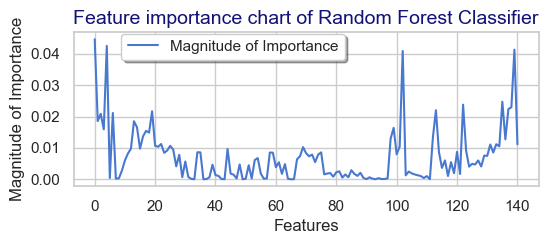

In [45]:
################################################################################################
# plot the feature importance chart details from the Random Forest Classifier 
################################################################################################

plt.figure(figsize=(6,2))
plt.plot(rfc.feature_importances_,label='Magnitude of Importance')
fontdict={'fontsize':14,'color':'#111177'}
plt.title('Feature importance chart of Random Forest Classifier',fontdict=fontdict)
plt.xlabel('Features')
plt.ylabel('Magnitude of Importance')
plt.legend(bbox_to_anchor=(0.1, 0.54, 0.5, 0.5),shadow=True)
plt.grid(True)
plt.show()



In [46]:
################################################################################################
# predict on the split dataset
################################################################################################

IQy_pred = rfc.predict(IQxtestFull)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.8s finished


In [47]:
################################################################################################
# physically compare the first 10 predicted vs actual values of the split dataset
################################################################################################

pd.DataFrame({'Actual Class ': IQytest, 'Predicted Class' : IQy_pred}).head(10)


,Actual Class,Predicted Class
3208,3,3
2183,4,4
2751,3,3
7813,2,2
7875,2,2
7815,2,2
7983,2,2
5013,3,3
2685,4,4
6905,2,2


In [48]:
################################################################################################
# check the accuracy of the Random Forest Classifier against the predicted and actual values
################################################################################################

from sklearn.metrics import accuracy_score
import numpy as np
accuracy =accuracy_score(IQy_pred,IQytest)
print('Random Forest Classifier Accuracy percentage is :',
      np.round(accuracy*100,decimals = 2), '%')


Random Forest Classifier Accuracy percentage is : 99.67 %


In [133]:
printmd('Random Forest Classifier Accuracy is 99.67%')

## <span style="color:red">Random Forest Classifier Accuracy is 99.67%</span>

In [50]:
################################################################################################
# check the confusion matrix of the RF Classifier against the predicted and actual values
################################################################################################

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(IQytest,IQy_pred)
print('   Confusion Matrix :')
print('   ------------------')
print(cm) 


   Confusion Matrix :
   ------------------
[[1057    0    0    3]
 [   2 1057    0    1]
 [   0    0 1060    0]
 [   2    3    3 1052]]


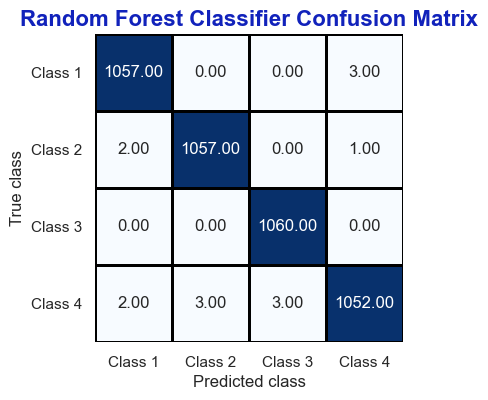

In [51]:
################################################################################################################################
# plot the confusion matrix of training and testing predictions and also print the traing classes counts 
################################################################################################################################
labels = ['Class 1', 'Class 2','Class 3','Class 4']
plt.figure(figsize=(4,4))
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
fontdict={'fontsize':16,'color':'#1122BB','fontweight':'bold'}
sns.heatmap(cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',yticklabels=labels,xticklabels=labels,\
            square=True,cmap=plt.cm.Blues,\
            cbar=False).set_title('Random Forest Classifier Confusion Matrix',fontdict=fontdict)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


In [52]:
################################################################################################
# check the classification report of the RF Classifier with the predicted and actual values
################################################################################################

from sklearn.metrics import classification_report
print(classification_report(IQytest,IQy_pred,
    target_names=['Class 1','Class 2','Class 3','Class 4']))


              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00      1060
     Class 2       1.00      1.00      1.00      1060
     Class 3       1.00      1.00      1.00      1060
     Class 4       1.00      0.99      0.99      1060

    accuracy                           1.00      4240
   macro avg       1.00      1.00      1.00      4240
weighted avg       1.00      1.00      1.00      4240



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished


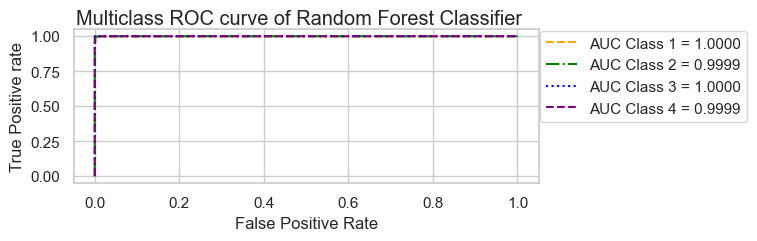

In [53]:
################################################################################################
# plot roc curve for multicalss split test data
################################################################################################

from sklearn.metrics import roc_curve, auc
pred_prob = rfc.predict_proba(IQxtestFull)


#################################################################################################
# mapping the classes from (4,3,2,1) to (3,2,1,0) for proper plotting 
#################################################################################################

IQytest1 = IQytest.apply(lambda x:x-1 )

#################################################################################################
# extracting the roc curve details for plotting 
#################################################################################################
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 4    
i = 0 
while i < n_class:
    fpr[i], tpr[i], thresh[i] = roc_curve(IQytest1, pred_prob[:,i], pos_label=i)
    i = i + 1

i = 0 
while i < n_class:
    roc_auc[i] = auc(fpr[i], tpr[i])
    i = i + 1
#################################################################################################
# plotting    
#################################################################################################

plt.figure(figsize=(6,2))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='AUC Class 1 = %0.4f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-.',color='green',  label='AUC Class 2 = %0.4f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle=':', color='blue',   label='AUC Class 3 = %0.4f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='AUC Class 4 = %0.4f'% roc_auc[3])
plt.suptitle('Multiclass ROC curve of Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(bbox_to_anchor=(0.965, 0.54, 0.5, 0.5))
plt.show()


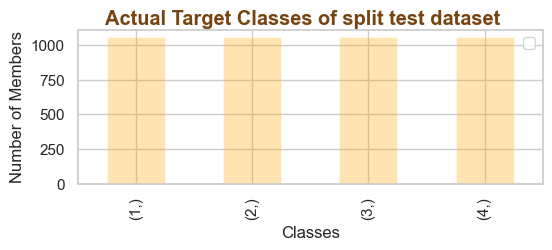

In [54]:
################################################################################################
# plot the groups of actual data
################################################################################################
plt.figure(figsize=(6,2))
TrueDF = pd.DataFrame(IQytest)
TrueDF.columns=['Actual Target Classes']
TrueDF.value_counts(sort=False).plot(kind='bar',color='orange',label='Actual Classes',alpha=.3)
fontdict={'fontsize':16,'color':'#774411'}
plt.suptitle('Actual Target Classes of split test dataset',fontdict=fontdict,fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Number of Members')
plt.legend('')
plt.show()


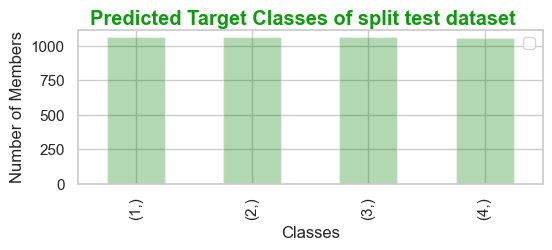

In [55]:
################################################################################################
# plot the groups of predicted data
################################################################################################
plt.figure(figsize=(6,2))
predDF = pd.DataFrame(IQy_pred)
predDF.columns=['Predicted Target Classes']
predDF.value_counts(sort=False).plot(kind='bar',color='green',label='Predicted Classes',alpha=.3)
fontdict={'fontsize':16,'color':'#119911'}
plt.suptitle('Predicted Target Classes of split test dataset',fontdict=fontdict,fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Number of Members')
plt.legend("")
plt.show()


In [56]:
################################################################################################
# perform the cross validation against the split dataset
################################################################################################

from sklearn.model_selection import cross_val_score

results = cross_val_score(rfc,IQxtrainFull,IQytrain,scoring='accuracy',cv=2)

print('RandomForest with Cross validation Accuracy percentage is :',
      np.round(results.mean()*100,decimals = 2), '%')



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest with Cross validation Accuracy percentage is : 98.35 %


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.0s finished


In [57]:
################################################################################################
# perform KFold cross validation against the split datasets
################################################################################################

from sklearn.model_selection import KFold
seed = 7
num_trees = 30

kfold = KFold(n_splits=2,random_state=seed,shuffle=True)
results = cross_val_score(rfc,IQxtrainFull,IQytrain,scoring='accuracy',cv=kfold)

print('RandomForest with KFold cross validation Accuracy percentage is :',
      np.round(results.mean()*100,decimals = 2), '%')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest with KFold cross validation Accuracy percentage is : 98.44 %


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.9s finished


In [58]:
printmd('Cross validation accuracy is 98.45%')

## <span style="color:red">Cross validation accuracy is 98.45%</span>

In [59]:
printmd('Prediction on the test dataset')

## <span style="color:red">Prediction on the test dataset</span>

In [60]:
################################################################################################
# download the input test dataset 
################################################################################################

IQdata_test = pd.read_csv('./datasets/IQtest.csv')


In [61]:
################################################################################################
# check the number of rows, columns and datatype numbers in test dataset
################################################################################################

IQdata_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [62]:
################################################################################################
# check the statistics on the test dataset
################################################################################################

IQdata_test.describe()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,0.990171,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,1.400000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,2.200000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,2.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,7.000000,...,97.000000,441.00000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000


In [63]:
################################################################################################
# look at the first 5 rows of the test dataset
################################################################################################

IQdata_test.head()


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [64]:
################################################################################################
# check the null value rows in the test dataset
################################################################################################

for i in IQdata_test.columns:
    if IQdata_test[i].isna().sum() != 0:
        print('column :', i, 'number of null value rows', IQdata_test[i].isna().sum())
        

column : v2a1 number of null value rows 17403
column : v18q1 number of null value rows 18126
column : rez_esc number of null value rows 19653
column : meaneduc number of null value rows 31
column : SQBmeaned number of null value rows 31


In [65]:
################################################################################################
# we will delete columns 'id', as it is of no use 
################################################################################################

IQdata_test = IQdata_test.drop(['Id'], axis=1)


In [66]:
################################################################################################
# we will impute 'v2a1','v18q1','rez_esc', with
# median value and 'meaneduc', 'SQBmeaned' with mean value
# as we did for the train dataset rows
################################################################################################


IQdata_test[['meaneduc']] = IQdata_test[['meaneduc']].ffill()
IQdata_test[['SQBmeaned']] = IQdata_test[['SQBmeaned']].ffill()

IQdata_test[['v2a1']] = IQdata_test[['v2a1']].ffill()
IQdata_test[['v18q1']] = IQdata_test[['v18q1']].ffill()
IQdata_test[['rez_esc']] = IQdata_test[['rez_esc']].ffill()

IQdata_test[['meaneduc']] = IQdata_test[['meaneduc']].bfill()
IQdata_test[['SQBmeaned']] = IQdata_test[['SQBmeaned']].bfill()

IQdata_test[['v2a1']] = IQdata_test[['v2a1']].bfill()
IQdata_test[['v18q1']] = IQdata_test[['v18q1']].bfill()
IQdata_test[['rez_esc']] = IQdata_test[['rez_esc']].bfill()


In [67]:
################################################################################################
# check the null values after imputing the test dataset
################################################################################################

for i in IQdata_test.columns:
    if IQdata_test[i].isna().sum() != 0:
        print('column :', i, 'number of null value rows', IQdata_test[i].isna().sum())
        

In [68]:
################################################################################################
# seperate the numerical and catgegorical variables from the original test dataset before scaling
################################################################################################

IQdataNum_test = IQdata_test.drop(['idhogar','dependency','edjefe','edjefa'],axis=1)
IQdataCat_test = IQdata_test[['idhogar','dependency','edjefe','edjefa']]


In [69]:
################################################################################################
# prepare the data for label encoding on the original test dataset (transform only, no fitting)
# by replacing the new labels with one of the existing label
################################################################################################

i = 0
while i < IQdataCat_test.shape[0]:
    
    if IQdataCat_test.idhogar.iat[i] not in IQx_idhogar_unique:
        IQdataCat_test.idhogar.iat[i] = IQx_idhogar_unique[0]
        
    if IQdataCat_test.dependency.iat[i] not in IQx_dependency_unique:
        IQdataCat_test.dependency.iat[i] = IQx_dependency_unique[0]
        
    if IQdataCat_test.edjefe.iat[i] not in IQx_edjefe_unique:
        IQdataCat_test.edjefe.iat[i] = IQx_edjefe_unique[0]
        
    if IQdataCat_test.edjefa.iat[i] not in IQx_edjefa_unique:
        IQdataCat_test.edjefa.iat[i] = IQx_edjefa_unique[0]
        
    i = i + 1
    

In [70]:
################################################################################################
# do the label encoding on the original test dataset (transform only, no fitting)
################################################################################################

IQdataCat_test.idhogar    = le_idhogar.transform(IQdataCat_test.idhogar)
IQdataCat_test.dependency = le_dependency.transform(IQdataCat_test.dependency)
IQdataCat_test.edjefe     = le_edjefe.transform(IQdataCat_test.edjefe)
IQdataCat_test.edjefa     = le_edjefa.transform(IQdataCat_test.edjefa)
   

In [71]:
###############################################################################################
# scale the original test dataset using standared scaler (transform only, no fitting)
###############################################################################################

IQdataTest_scaled = scaler.transform(IQdataNum_test)


In [72]:
###############################################################################################
# concatenate the categorical and numerical parts of original Test dataset 
###############################################################################################

IQTestFull = np.concatenate((IQdataCat_test,IQdataTest_scaled),axis=1)


In [73]:
################################################################################################
# check the shape of the test dataset
################################################################################################

IQTestFull.shape


(23856, 141)

In [74]:
################################################################################################
# Do the actual prediction on original test dataset with Random Forest Classifier 
################################################################################################

IQY_test_pred = rfc.predict(IQTestFull)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.8s finished


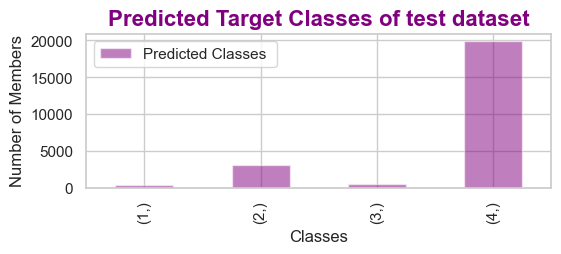

In [75]:
################################################################################################
# plot the predictions of original test dataset with 23856 rows on Random Forest Classifier 
################################################################################################

plt.figure(figsize=(6,2))
Testdf = pd.DataFrame(IQY_test_pred)
Testdf.columns=['Predicted Target Classes of Test dataset']
Testdf.value_counts(sort=False).plot(kind='bar',color='purple',label='Predicted Classes ',alpha=.5)
fontdict={'fontsize':16,'color':'purple','fontweight':'bold'}
plt.title('Predicted Target Classes of test dataset',fontdict=fontdict)
plt.xlabel('Classes')
plt.ylabel('Number of Members')
plt.legend()
plt.show()


In [76]:
printmd("Like training data, test data is also imbalance. However, we can't balance this data as there is no \
target variable in the file") 

## <span style="color:red">Like training data, test data is also imbalance. However, we can't balance this data as there is no target variable in the file</span>

In [77]:
printmd('Deep Neural Network Model')

## <span style="color:red">Deep Neural Network Model</span>

In [78]:
##############################################################################################################
# import the libraries for deep learning model building
##############################################################################################################
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers 

In [79]:
##############################################################################################################
# build the deep learnig model and compile for loan data analysis 
##############################################################################################################
def Create_Model():
    model = Sequential()
    model.add(Input(shape=(141,)))
    model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001)))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))
    model.add(Dropout(.2))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(16, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001)))
    model.add(Dropout(.2))

    model.add(Dense(4, activation=tf.nn.softmax))
    return model

In [80]:
##############################################################################################################
# Instantiate the deep learnig model and compile for loan data analysis 
##############################################################################################################
model = Create_Model()

In [81]:
##############################################################################################################
# define check points  
##############################################################################################################
FILEPATHA="./Weights/weights_IncomeQualification_Data_Analysis_NEW.hdf5"
#FILEPATHA='./Weights/weights_IncomeQualification_Data_Analysis_99.623%.hdf5'
checkpoint = ModelCheckpoint(FILEPATHA, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
RLROP_PAT = 5
DECAY_DROP = 0.95

Reduce_lr_on_plat=ReduceLROnPlateau(monitor='val_accuracy',mode='auto',patience=RLROP_PAT,factor=DECAY_DROP,\
                                    min_lr=1e-19,verbose=2)

callbacks = [tqdm_callback, checkpoint, Reduce_lr_on_plat ] 
 

In [82]:
##############################################################################################################
# check the shape of the input features file  
##############################################################################################################
IQxtrainFull.shape

(16956, 141)

In [83]:
##############################################################################################################
# do the one hot encoding of the target file data as required to use the categorical entropy
##############################################################################################################

IQytrain_onehot =  tf.keras.utils.to_categorical(IQytrain)
IQytest_onehot =  tf.keras.utils.to_categorical(IQytest)

In [84]:
##############################################################################################################
# remove the first column of the one hotencoded file as we don't use it 
##############################################################################################################
IQytrain_onehot =  IQytrain_onehot[:,1:]
IQytest_onehot  =  IQytest_onehot[:,1:]

In [85]:
##############################################################################################################
# finally look at the one hot encoded file for proper format 
##############################################################################################################
IQytrain_onehot

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [136]:
##############################################################################################################
# load the model for prediction and also print the model summary of the loaded model 
##############################################################################################################
#model.load_weights("./Weights/weights_IncomeQualification_Data_Analysis_99.623%.hdf5")
model = load_model(FILEPATHA)
#model.load_weights("./Weights/weights_IncomeQualification_Data_Analysis.hdf5")  # this is better than the other
lr=1e-7
optimizer  = tf.keras.optimizers.Adam(lr=lr, beta_1=0.9)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy']) 

model.summary()                                                                                                     

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               36352     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [135]:
##############################################################################################################
# fit the built model and run it for 1000 epochs
##############################################################################################################
history = model.fit(IQxtrainFull,IQytrain_onehot, validation_data=(IQxtestFull,IQytest_onehot),     
                    batch_size=170, epochs=25, verbose=0,callbacks=callbacks)

Training:   0%|                                                                                0/25 ETA: ?s,  …

Epoch 1/25


0/100                                                                                                        E…


Epoch 00001: val_accuracy did not improve from 0.99575
Epoch 2/25


0/100                                                                                                        E…


Epoch 00002: val_accuracy did not improve from 0.99575
Epoch 3/25


0/100                                                                                                        E…


Epoch 00003: val_accuracy did not improve from 0.99575
Epoch 4/25


0/100                                                                                                        E…


Epoch 00004: val_accuracy did not improve from 0.99575
Epoch 5/25


0/100                                                                                                        E…


Epoch 00005: val_accuracy did not improve from 0.99575
Epoch 6/25


0/100                                                                                                        E…


Epoch 00006: val_accuracy did not improve from 0.99575

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.500000111017925e-08.
Epoch 7/25


0/100                                                                                                        E…


Epoch 00007: val_accuracy did not improve from 0.99575
Epoch 8/25


0/100                                                                                                        E…


Epoch 00008: val_accuracy did not improve from 0.99575
Epoch 9/25


0/100                                                                                                        E…


Epoch 00009: val_accuracy did not improve from 0.99575
Epoch 10/25


0/100                                                                                                        E…


Epoch 00010: val_accuracy did not improve from 0.99575
Epoch 11/25


0/100                                                                                                        E…


Epoch 00011: val_accuracy did not improve from 0.99575

Epoch 00011: ReduceLROnPlateau reducing learning rate to 9.025000409224048e-08.
Epoch 12/25


0/100                                                                                                        E…


Epoch 00012: val_accuracy did not improve from 0.99575
Epoch 13/25


0/100                                                                                                        E…


Epoch 00013: val_accuracy did not improve from 0.99575
Epoch 14/25


0/100                                                                                                        E…


Epoch 00014: val_accuracy did not improve from 0.99575
Epoch 15/25


0/100                                                                                                        E…


Epoch 00015: val_accuracy did not improve from 0.99575
Epoch 16/25


0/100                                                                                                        E…


Epoch 00016: val_accuracy did not improve from 0.99575

Epoch 00016: ReduceLROnPlateau reducing learning rate to 8.573750456264405e-08.
Epoch 17/25


0/100                                                                                                        E…


Epoch 00017: val_accuracy did not improve from 0.99575
Epoch 18/25


0/100                                                                                                        E…


Epoch 00018: val_accuracy did not improve from 0.99575
Epoch 19/25


0/100                                                                                                        E…


Epoch 00019: val_accuracy did not improve from 0.99575
Epoch 20/25


0/100                                                                                                        E…


Epoch 00020: val_accuracy did not improve from 0.99575
Epoch 21/25


0/100                                                                                                        E…


Epoch 00021: val_accuracy did not improve from 0.99575

Epoch 00021: ReduceLROnPlateau reducing learning rate to 8.145062899700405e-08.
Epoch 22/25


0/100                                                                                                        E…


Epoch 00022: val_accuracy did not improve from 0.99575
Epoch 23/25


0/100                                                                                                        E…


Epoch 00023: val_accuracy did not improve from 0.99575
Epoch 24/25


0/100                                                                                                        E…


Epoch 00024: val_accuracy did not improve from 0.99575
Epoch 25/25


0/100                                                                                                        E…


Epoch 00025: val_accuracy did not improve from 0.99575


In [137]:
##############################################################################################################
# extract the variables for accuracy and loss reporting
##############################################################################################################
train_loss, train_acc = model.evaluate(IQxtrainFull,IQytrain_onehot, verbose=2,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(IQxtestFull,IQytest_onehot, verbose=2,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

0/530                                                                                              ETA: ?s - E…

530/530 - 1s - loss: 0.0292 - accuracy: 0.9976


0/133                                                                                              ETA: ?s - E…

133/133 - 0s - loss: 0.0367 - accuracy: 0.9958
Train Accu: 0.998, Test Accu: 0.996
Train Loss: 0.029, Test Loss: 0.037


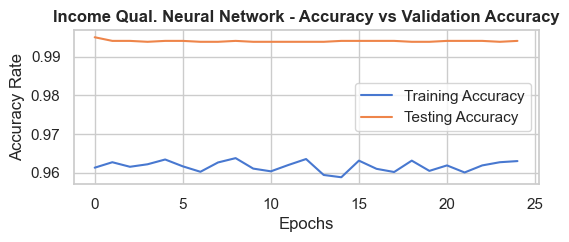

In [138]:
##############################################################################################################
# create training and testing accuracy chart
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Income Qual. Neural Network - Accuracy vs Validation Accuracy',fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Rate')
plt.legend()
plt.grid(True)
plt.show()

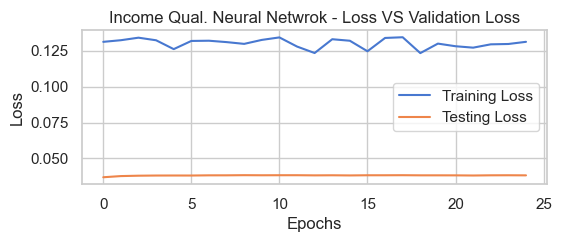

In [139]:
##############################################################################################################
# create the trainig and testing loss chart
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Income Qual. Neural Netwrok - Loss VS Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [140]:
##############################################################################################################
# predict and extract the count of rows with probability more than .5 as the loan default indicator
##############################################################################################################
pred=model.predict(IQxtestFull)
predClass = np.argmax(pred,axis=1)


In [141]:
##############################################################################################################
# extract the classes predicted by the model
##############################################################################################################
pred1=model.predict_classes(IQxtestFull)


<Figure size 600x200 with 0 Axes>

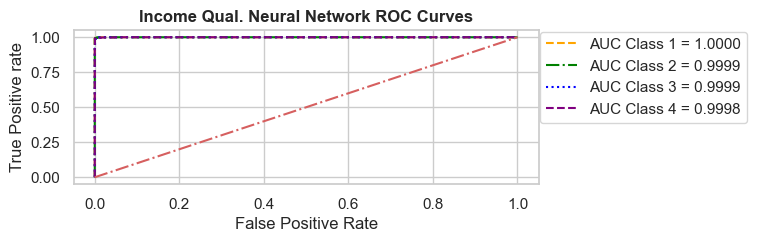

In [142]:
##############################################################################################################
# import rquired library and create the roc curve 
##############################################################################################################
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))

fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 4  
pred_prob = model.predict_proba(IQxtestFull)
IQytest1 = IQytest.apply(lambda x: x-1 )
i = 0 
while i < n_class:
    fpr[i], tpr[i], thresh[i] = roc_curve(IQytest1, pred_prob[:,i], pos_label=i)
    i = i + 1

i = 0 
while i < n_class:
    roc_auc[i] = auc(fpr[i], tpr[i])
    i = i + 1
#################################################################################################
# plotting    
#################################################################################################

plt.figure(figsize=(6,2))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='AUC Class 1 = %0.4f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-.',color='green',  label='AUC Class 2 = %0.4f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle=':', color='blue',   label='AUC Class 3 = %0.4f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='AUC Class 4 = %0.4f'% roc_auc[3])
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Income Qual. Neural Network ROC Curves',fontweight='bold')
plt.legend(bbox_to_anchor=(0.965, 0.54, 0.5, 0.5))
plt.show()



In [143]:
##############################################################################################################
# check if the target field values are properly distributed points  
##############################################################################################################
IQytest1.value_counts()

2    1060
3    1060
1    1060
0    1060
Name: Target, dtype: int64

Confusion matrix of Income Qualification Data
[[1060    0    0    0]
 [   4 1051    4    1]
 [   0    0 1060    0]
 [   1    1    7 1051]]


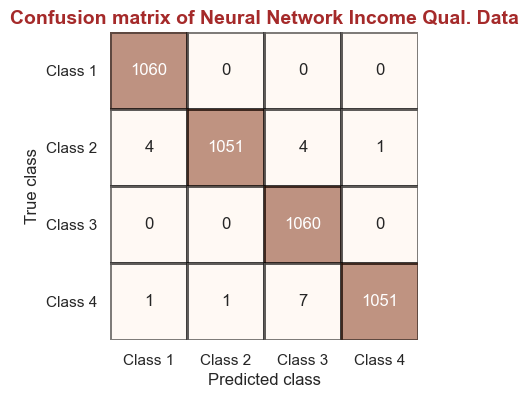

In [144]:
##############################################################################################################
# create the confusion martrix of predicted and actual values for comparision.
##############################################################################################################

from sklearn.metrics import confusion_matrix, classification_report
LABELS=['Class 1','Class 2','Class 3','Class 4']
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
conf_matrix = confusion_matrix(IQytest1, pred1)
print('Confusion matrix of Income Qualification Data' )
print(conf_matrix)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,linewidths=2,linecolor='black',square=True,cbar=False,alpha=.5,
            annot=True,robust=True, fmt="d",cmap=plt.cm.Oranges);
fontdict={'fontsize':14,'color':'brown','fontweight':'bold'}
plt.title("Confusion matrix of Neural Network Income Qual. Data",fontdict=fontdict)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()

In [145]:
##############################################################################################################
# create the classification report of the model output
##############################################################################################################
print(classification_report(IQytest1, pred1,target_names=LABELS))

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00      1060
     Class 2       1.00      0.99      1.00      1060
     Class 3       0.99      1.00      0.99      1060
     Class 4       1.00      0.99      1.00      1060

    accuracy                           1.00      4240
   macro avg       1.00      1.00      1.00      4240
weighted avg       1.00      1.00      1.00      4240



In [146]:
################################################################################################
# Do the actual prediction on original test dataset with Neural Network Model Classifier 
################################################################################################

IQY_test_pred_DNN = model.predict_classes(IQTestFull)


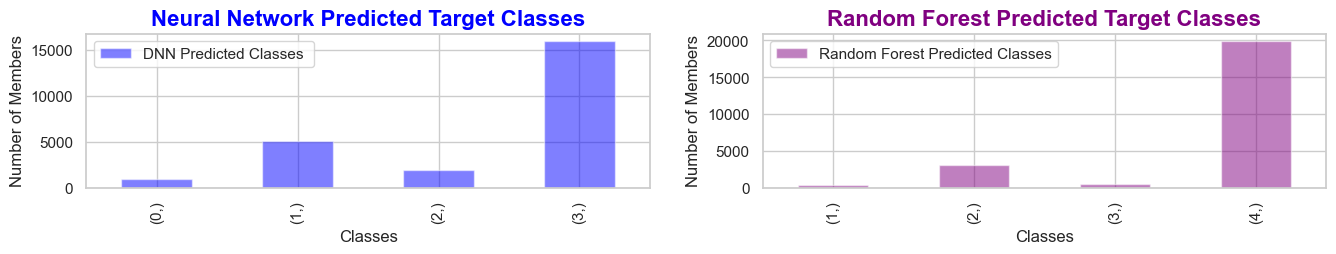

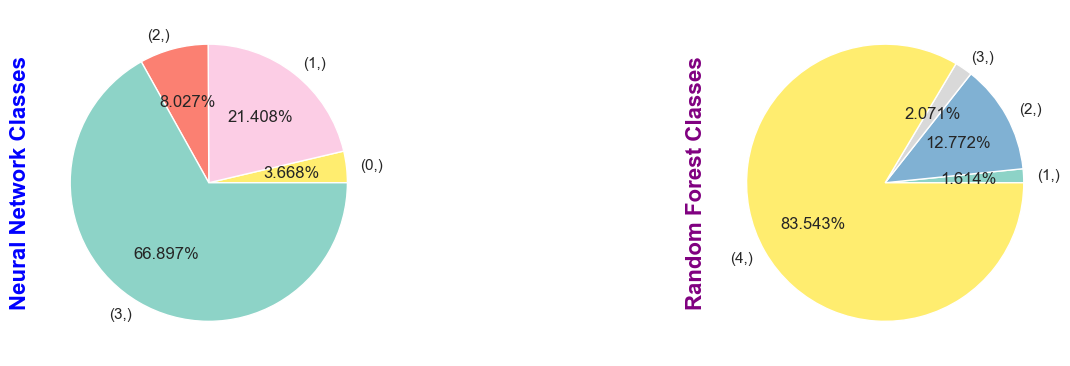

In [147]:
################################################################################################
# plot the predictions of original test dataset with 23856 rows on Random Forest Classifier 
################################################################################################
plt.figure(figsize=(16,2))
plt.subplots_adjust(wspace=.2,hspace=None)
plt.subplot(1,2,1)
Testdfdnn = pd.DataFrame(IQY_test_pred_DNN)
Testdfdnn.columns=['Neural Network Predicted Target Classes']
Testdfdnn.value_counts(sort=False).plot(kind='bar',color='blue',label='DNN Predicted Classes ',alpha=.5)
fontdict={'fontsize':16,'color':'blue','fontweight':'bold'}
plt.title('Neural Network Predicted Target Classes',fontdict=fontdict)
plt.xlabel('Classes')
plt.ylabel('Number of Members')
plt.legend()
plt.subplot(1,2,2)
Testdf = pd.DataFrame(IQY_test_pred)
Testdf.columns=['Random Forest Predicted Target Classes']
Testdf.value_counts(sort=False).plot(kind='bar',color='purple',label='Random Forest Predicted Classes',alpha=.5)
fontdict={'fontsize':16,'color':'purple','fontweight':'bold'}
plt.title('Random Forest Predicted Target Classes',fontdict=fontdict)
plt.xlabel('Classes')
plt.ylabel('Number of Members')
plt.legend(loc='upper left')
plt.show()


plt.figure(figsize=(16,4.5))
plt.subplots_adjust(wspace=None,hspace=None)
plt.subplot(1,2,1)
Testdfdnn = pd.DataFrame(IQY_test_pred_DNN)
Testdfdnn.columns=['Neural Network Predicted Target Classes']
Testdfdnn.value_counts(sort=False).plot(kind='pie',cmap='Set3_r',autopct='%.3f%%')
plt.ylabel('Neural Network Classes',color='blue',fontweight='bold',fontsize=16)
plt.subplot(1,2,2)
Testdf = pd.DataFrame(IQY_test_pred)
Testdf.columns=['Random Forest Predicted Target Classes']
Testdf.value_counts(sort=False).plot(kind='pie',cmap='Set3',autopct='%.3f%%')
plt.ylabel('Random Forest Classes',color='purple',fontweight='bold',fontsize=16)
plt.show()



In [148]:
printmd('Deep Neural Network Classifier Val. Accuracy is 99.58%; almost same as Random Forest Classifier.')
printmd('However, Deep Neural Network test classes are better spreadout than Random Forest test classes.')

## <span style="color:red">Deep Neural Network Classifier Val. Accuracy is 99.58%; almost same as Random Forest Classifier.</span>

## <span style="color:red">However, Deep Neural Network test classes are better spreadout than Random Forest test classes.</span>

In [100]:
Testdfdnn.value_counts(sort=False), Testdf.value_counts(sort=False)

(Neural Network Predicted Target Classes
 0                                           1072
 1                                           4931
 2                                           2054
 3                                          15799
 dtype: int64,
 Random Forest Predicted Target Classes
 1                                           385
 2                                          3047
 3                                           494
 4                                         19930
 dtype: int64)